In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Reading or importing csv table into a pandas table by using read_csv function
# remember to upload the csv file into the same folder as ipynb file is in, to use it as direct instead of path

df = pd.read_csv("car_dataset.csv")

In [3]:
# this will show how many columns and rows are present in the table
df.shape

(205, 26)

In [4]:
# this will show the first five rows in the table along with column names
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# this shows some of the statistical values from the data in the table
# Here we can check if there are any abnormalities in the data.
df.describe()


,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# this will show the data types of the values in the columns and no of columns that have the data 
# here we can verify if there are any null values in the data, If so we have to enter data for that feature of that row.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# This will show the count of unique values in each column
# Here we can understand the Importance of including a column or not, 
# If a column has high unique values, then it can give a better result upon training and testing
# If a column has low unique values, the predicted result will have a high error.
# this is only true for single input Linear Regression, If you are using multiple featured Linear Regression,
# then the column with low unique values will help the model to be more accurate
df.nunique()

ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
# this will show all the names of Columns or Features in the table
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [9]:
# as we are creating a model for one input and one out feature, we create a new data table
# By selecting the needed rows from the original or initial data table
new_df = df[['enginesize','price']]
new_df

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


<Axes: xlabel='enginesize', ylabel='price'>

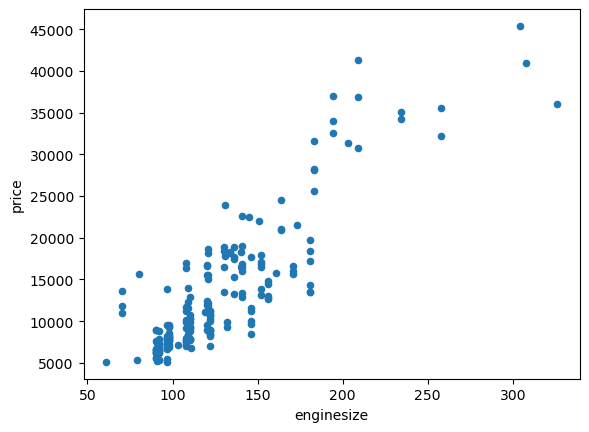

In [10]:
# this is scatter plot graph to show the spread or placement of the values from the selected column
new_df.plot(x='enginesize', y='price', kind = 'scatter')

<Axes: xlabel='fueltypes', ylabel='price'>

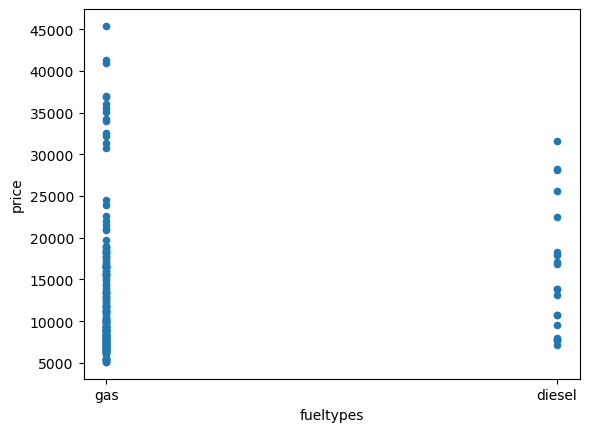

In [11]:
# this is just to show how a non unique data will Bias the plot thus giving in accurate model.
df.plot(x='fueltypes', y='price', kind='scatter')

In [12]:
# Defining two variables x and y and assiging the values as in the columns enginesize and price respectively.
x = new_df['enginesize']
y = new_df['price']

In [13]:
# From the whole data in the array, generally we use 80% of the data to train the ML model and 20% to test.
# So when we test the model we can have actual value to compare with the model predicted value.
# x_train -> feature values used as an input parameter to train the model
# y_train -> feature values used as an output parameter to train the model 
# so ML model derives a relation between these two features values and forms an linear equation as Y = βX + c
# where c is called the intercept and β is called coefficient
# x_test = feature values used as an input parameter to test the model 
# y_train -> feature values used to compare with the predicted values to check accuracy and error and other metrics
# y_pred -> value predicted by the trained model from the input of x_test values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
# This is to check and verify that x_train count = y_train and x_test count = y_test count.
# If they are not equal then there is missing or null data in the array and cannot be used to train or test the data


print("X_Train ", x_train.shape)
print("X_Test ", x_test.shape)
print("Y_Train ", x_train.shape)
print("Y_Test ", x_train.shape)


X_Train  (164,)
X_Test  (41,)
Y_Train  (164,)
Y_Test  (164,)


In [15]:
# Defining name of the ML model as 'model', and defining the type of ML Model used, by calling the function from SKLearn Library
model = LinearRegression()

In [16]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [17]:
# showing the Co-efficient or β from the now trained model.
model.coef_

array([164.31545172])

In [18]:
# showing the Intercept or c from the now trained model.
model.intercept_

-7613.370939489803

In [19]:
# Make predictions from the test data, by using trained model.
# As we used the name for our ML model as 'model', we are using the word model and its a varable that can be of any string given to it
y_pred = model.predict(x_test.values.reshape(-1,1))

In [20]:
# calculating the metrics
# These are to determine the accuracy and functionality of the ML model.
# Calculated by comparing tested output 'y_train' and predicted output 'y_pred'.
# 1. Mean Squared Error 

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error = ", mse)

# Mean Squared error is mean of diffrences between squared actual value y_test and squared predicted value y_pred (y_test^2-y_pred^2)
# The error is squared because some times when we get negative values and very small values as error it cannot show significance
    

Mean Squared Error =  16835544.03813768


In [21]:
# Root Mean Squared Error. which is just square roor of Mean Squared Error

rmse = math.sqrt(mse)

print("Root Mean Squared Error = ", rmse)

# Using RMSE is better than using error directly because it takes out negative values.
# Thus giving us better idea on how much the actual and predicted values are deviated

Root Mean Squared Error =  4103.113944084137


In [22]:
# Mean Absolute Error. Mean of diffrence between y_test and y-Pred

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error = ", mae)

Mean Absolute Error =  3195.0312395000433


In [23]:
# R^2 or Squared Residual is 1 - (Sum of Squared Regressions(SSR)/Total Sum of Squares(SST))
# SSR is Sum of Squared value of (y_test - y_pred) of each row or each x_test value
# SST is Sum of Squared value of (y_pred - mean of y_test) of each x_test value

r2_2 = r2_score(y_test, y_pred)

print("Coefficient of Determination =  ", r2_2)

# R^2 = 1 mean all the predicted values are correct, but in reality it wont happen and hence this means, model is not trained correctly.
# R^2 value is near to 1 mean, model prediction is very accurate
# R^2 value is close to 0 means, model prediction is very bad
# Ideally above 80 to 98% can be accepted as a good model


Coefficient of Determination =   0.7825324721447274


Text(0, 0.5, 'Predicted')

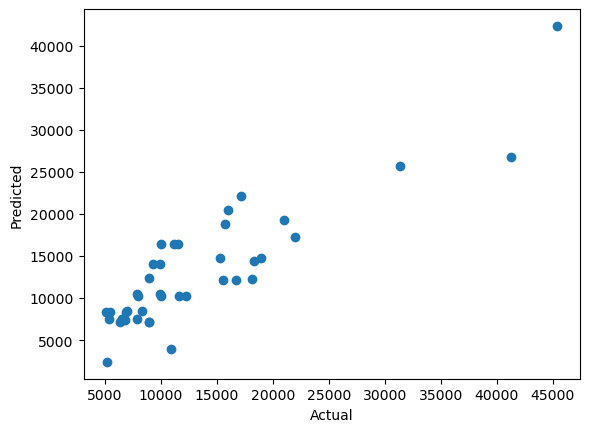

In [24]:
# Plotting actual and predicted values
# We can alter the model if these plotted points are aligned in a line or close to a line
# If not we have to re consider the data 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='price'>

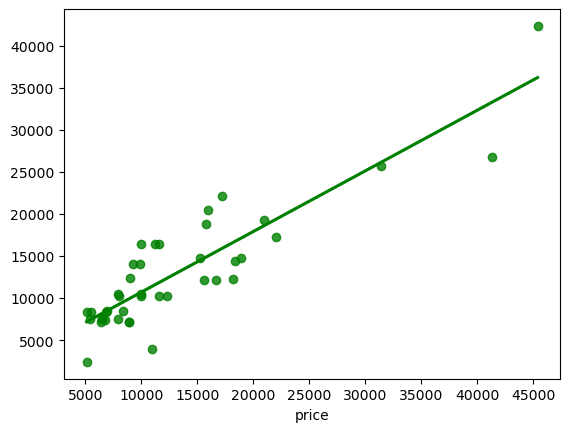

In [25]:
# Plotting the regression model line

sns.regplot(x=y_test, y=y_pred, ci=None, color='green')

## Now lets try and add horse power to the data and create Multivariable Linear Regression model

<Axes: xlabel='horsepower', ylabel='price'>

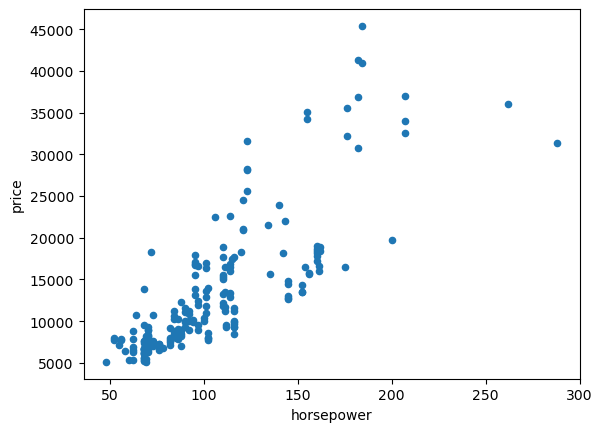

In [26]:
df.plot(x='horsepower', y='price', kind='scatter')

## Here we can see a relation between price and horce power, as a conical expansion from (0,0) to highest point digagonally, Hence we can use to improve the accuracy.

In [27]:
# so we declare the x values changing from the above single feature to two features.
# As we are trying to predict the price same as above model, we need not to declare y again.

x = df[['enginesize', 'horsepower']]
x

,enginesize,horsepower
0,130,111
1,130,111
2,152,154
3,109,102
4,136,115
...,...,...
200,141,114
201,141,160
202,173,134
203,145,106


In [28]:
# y will be the same as above model.
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [29]:
# declaring the test and train size just as above model.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
# checking the counts just as above
print("X_Train ", x_train.shape)
print("X_Test ", x_test.shape)
print("Y_Train ", x_train.shape)
print("Y_Test ", x_train.shape)


X_Train  (164, 2)
X_Test  (41, 2)
Y_Train  (164, 2)
Y_Test  (164, 2)


In [31]:
model = LinearRegression()

In [32]:
# Just as mentioned previous model, we are using 2d array hence no need to reshape to (-1,1)
model.fit(x_train, y_train)

LinearRegression()

In [33]:
# showing the Co-efficient or β from the now trained model.
model.coef_

array([115.9909421,  64.2026329])

In [34]:
# showing the Intercept or c from the now trained model.
model.intercept_

-8148.677422999768

In [35]:
# Make predictions from the test data, by using trained model.
y_pred = model.predict(x_test)

In [36]:
# let's calculate the metrics
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = math.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)

In [37]:
# print them all
print("MSE --> ", mse_2)
print("RMSE --> ", rmse_2)
print("MAE --> ", mae_2)
print("R2 --> ", r2_3)

MSE -->  15514797.066791011
RMSE -->  3938.8827180802186
MAE -->  3061.6172627779783
R2 -->  0.7995927808659935


Text(0, 0.5, 'Predicted')

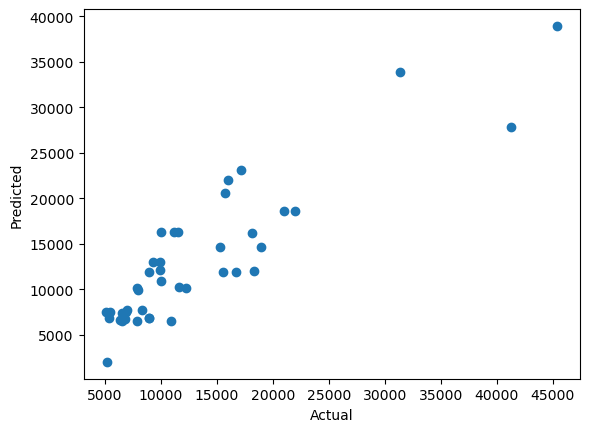

In [38]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='price'>

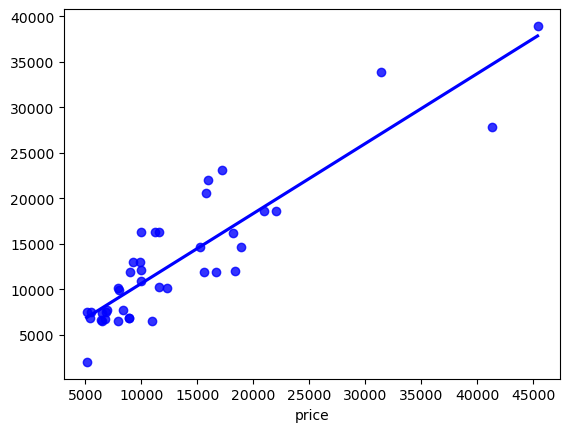

In [39]:
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

In [40]:
# create a metrics dataframe using metric values
metrics = {
    'Model': ['First', 'Second'],
    'MSE' : [mse, mse_2],
    'RMSE' : [rmse, rmse_2],
    'MAE' : [mae, mae_2],
    'R2' : [r2_2, r2_3]
    }

metrics_df = pd.DataFrame(data=metrics)

In [41]:
# compare the values
metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,1.683554e+07,4103.113944,3195.031240,0.782532
1,Second,1.551480e+07,3938.882718,3061.617263,0.799593


## Here we can observe the improvement as error values are reduced and R2 accuracy is improved by 1%

Now lets try all the features in the data frame and Check the metrics

In [42]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [64]:
# we are giving all features to x except price as that is what we wan to predict. 
# Also as we are doing regression we cannot use any data types except flots or int. hence exclude all string valued features
x=df[['ID', 'symboling', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
x

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [65]:
# we need not declare y again as its already set in previous models
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [66]:
# declaring the test and train size just as above models.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [67]:
# checking the counts just as above
print("X_Train ", x_train.shape)
print("X_Test ", x_test.shape)
print("Y_Train ", x_train.shape)
print("Y_Test ", x_train.shape)


X_Train  (164, 15)
X_Test  (41, 15)
Y_Train  (164, 15)
Y_Test  (164, 15)


In [68]:
# as we are using multi dimensional array we proceed without reshaping
model.fit(x_train, y_train)

LinearRegression()

In [69]:
# showing the Co-efficient or β from the now trained model.
model.coef_

array([-1.37412469e+01,  3.59104527e+02,  1.43139814e+02, -8.74347818e+01,
        6.38159486e+02,  1.95998495e+02,  2.55583277e+00,  8.91021643e+01,
        9.38914099e+01, -3.56197284e+03,  2.98720238e+02,  4.84749141e+01,
        2.05809795e+00, -2.58793464e+02,  2.12705868e+02])

In [70]:
# showing the Intercept or c from the now trained model.
model.intercept_

-62359.49221178792

In [71]:
# Make predictions from the test data, by using trained model.
y_pred = model.predict(x_test)

In [72]:
# let's calculate the metrics
mse_a = mean_squared_error(y_test, y_pred)
rmse_a = math.sqrt(mse_2)
mae_a = mean_absolute_error(y_test, y_pred)
r2_a = r2_score(y_test, y_pred)

In [74]:
# print them all
print("MSE --> ", mse_a)
print("RMSE --> ", rmse_a)
print("MAE --> ", mae_a)
print("R2 --> ", r2_a)

MSE -->  12114256.336263908
RMSE -->  3938.8827180802186
MAE -->  2462.5936709343337
R2 -->  0.843518132156316


Text(0, 0.5, 'Predicted')

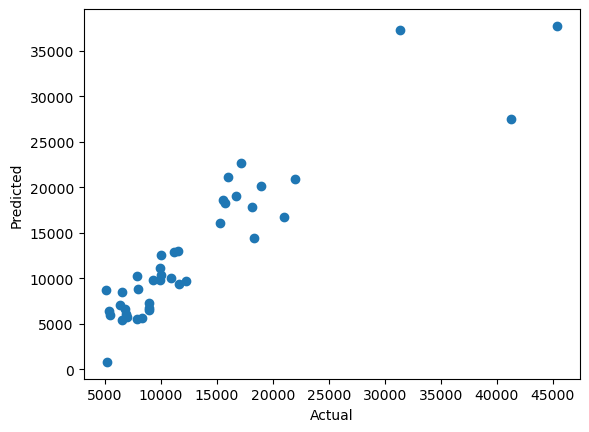

In [75]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='price'>

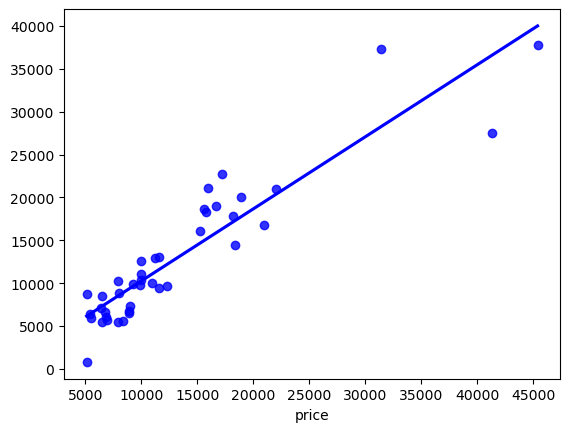

In [76]:
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

In [77]:
# create a metrics dataframe using metric values
Final_metrics = {
    'Model': ['First', 'Second','Final'],
    'MSE' : [mse, mse_2, mse_a],
    'RMSE' : [rmse, rmse_2, rmse_a],
    'MAE' : [mae, mae_2, mae_a],
    'R2' : [r2_2, r2_3, r2_a]
    }

Final_metrics_df = pd.DataFrame(data=Final_metrics)

In [79]:
# compare the values
Final_metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,1.683554e+07,4103.113944,3195.031240,0.782532
1,Second,1.551480e+07,3938.882718,3061.617263,0.799593
2,Final,1.211426e+07,3938.882718,2462.593671,0.843518


## Final Conclusion

The model when developed with all float values in the data frame, we got improvement in the final accuracy.
The model got a final accuracy to 84%, which is good but also can be improved by checking the features and understanding the features which helped the most and which reduced the accuracy.